# Assignment 2
The objective of this assignment is to get you familiarized with  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://drive.google.com/file/d/1ujsKv9W5eidb4TXt1pnsqwDKVDFtzZTh/view?usp=sharing).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.
- Upload  the  notebook,  report  and  classification  results as a zip file to moodle. Name the zip file as `<rollnumber>_assignment2.zip`

In [2]:
# Installing Libraries
!pip install scikit-learn matplotlib Pillow

  Using cached https://files.pythonhosted.org/packages/31/9f/042db462417451e81035c3d43b722e88450c628a33dfda69777a801b0d40/scikit_learn-0.20.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/32/6b/0368cfa5e1d1ae169ab7dc78addda3fd5e6262e48d7373a9114bac7caff7/matplotlib-2.2.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1b/08/ff620ef5a6128ee6e7a505f5716f81fce7b71f3a69e99646ebe64e0b9984/Pillow-6.2.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d7/b1/3367ea1f372957f97a6752ec725b87886e12af1415216feec9067e31df70/numpy-1.16.5-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1d/f6/7c16d60aeb3694e5611976cb4f1eaf1c6b7f1e7c55771d691013405a02ea/scipy-1.2.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/da/d1/080d2bb13773803648281a49e3918f65b31b7beebf009887a529357fd44a/backports.functools_lru

In [3]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE


plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [4]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

### Load Dataset

In [5]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [6]:
# Loading the dataset
# eg.
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

Dataset shape: (400, 32, 32, 3)


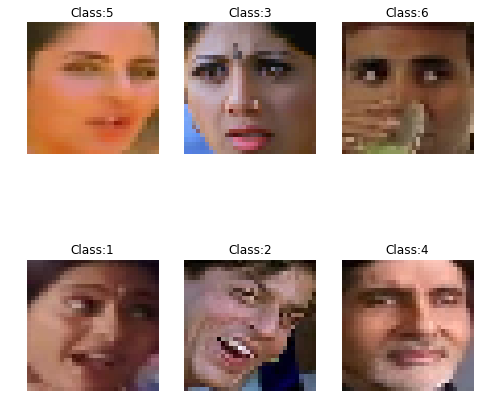

In [7]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

**VGG and Resnet features are last layer features learned by training a model for image classification**
    
---


In [8]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [9]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    return X_k

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [10]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree)
    X_k = kpca.fit_transform(X)
    return X_k

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.
This method for facial recognition is less sensitive to variation in lighting and pose of the face than using eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimension reduction stage.

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [11]:
def get_lda(X,y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    return X_k

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [12]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    # Transform  input
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X,y)
    return X_k

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.

The model was trained for face classification on each dataset and each feature the dimension of 4096.

In [13]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 

A 50 layer resnet model was trained for face classification on each dataset. Each feature the dimension of 2048

In [14]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 

___________________________

<font color='blue'>Eigen faces are the eigen vectors of a dataset of faces.
Each face in the dataset is a weighted sum of the eigen faces. Some eigen faces are more useful than others, hence the least significant ones are discarded in order to compress the dataset.</font>

1(b).  How many eigen vec-tors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples andmake a convincing argument.

In [15]:
dirpath1 = './dataset/IMFDB/'
X1,y1 = load_data(dirpath1)
N,H,W = X1.shape[0:3]
C = 1 if opt['is_grayscale'] else X1.shape[3]
# Flatten to apply PCA/LDA
X1 = X1.reshape((N,H*W*C))
X1_3D = get_pca(X1,3)

dirpath2 = './dataset/IIIT-CFW/'
X2,y2 = load_data(dirpath2)
N,H,W = X2.shape[0:3]
C = 1 if opt['is_grayscale'] else X2.shape[3]
# Flatten to apply PCA/LDA
X2 = X2.reshape((N,H*W*C))
X2_3D = get_pca(X2,3)

dirpath3 = './dataset/Yale_face_database/'
X3,y3 = load_data(dirpath3)
N,H,W = X3.shape[0:3]
C = 1 if opt['is_grayscale'] else X3.shape[3]
# Flatten to apply PCA/LDA
X3 = X3.reshape((N,H*W*C))
X3_3D = get_pca(X3,3)

Dataset shape: (400, 32, 32, 3)
Dataset shape: (672, 32, 32, 3)
Dataset shape: (165, 32, 32, 3)


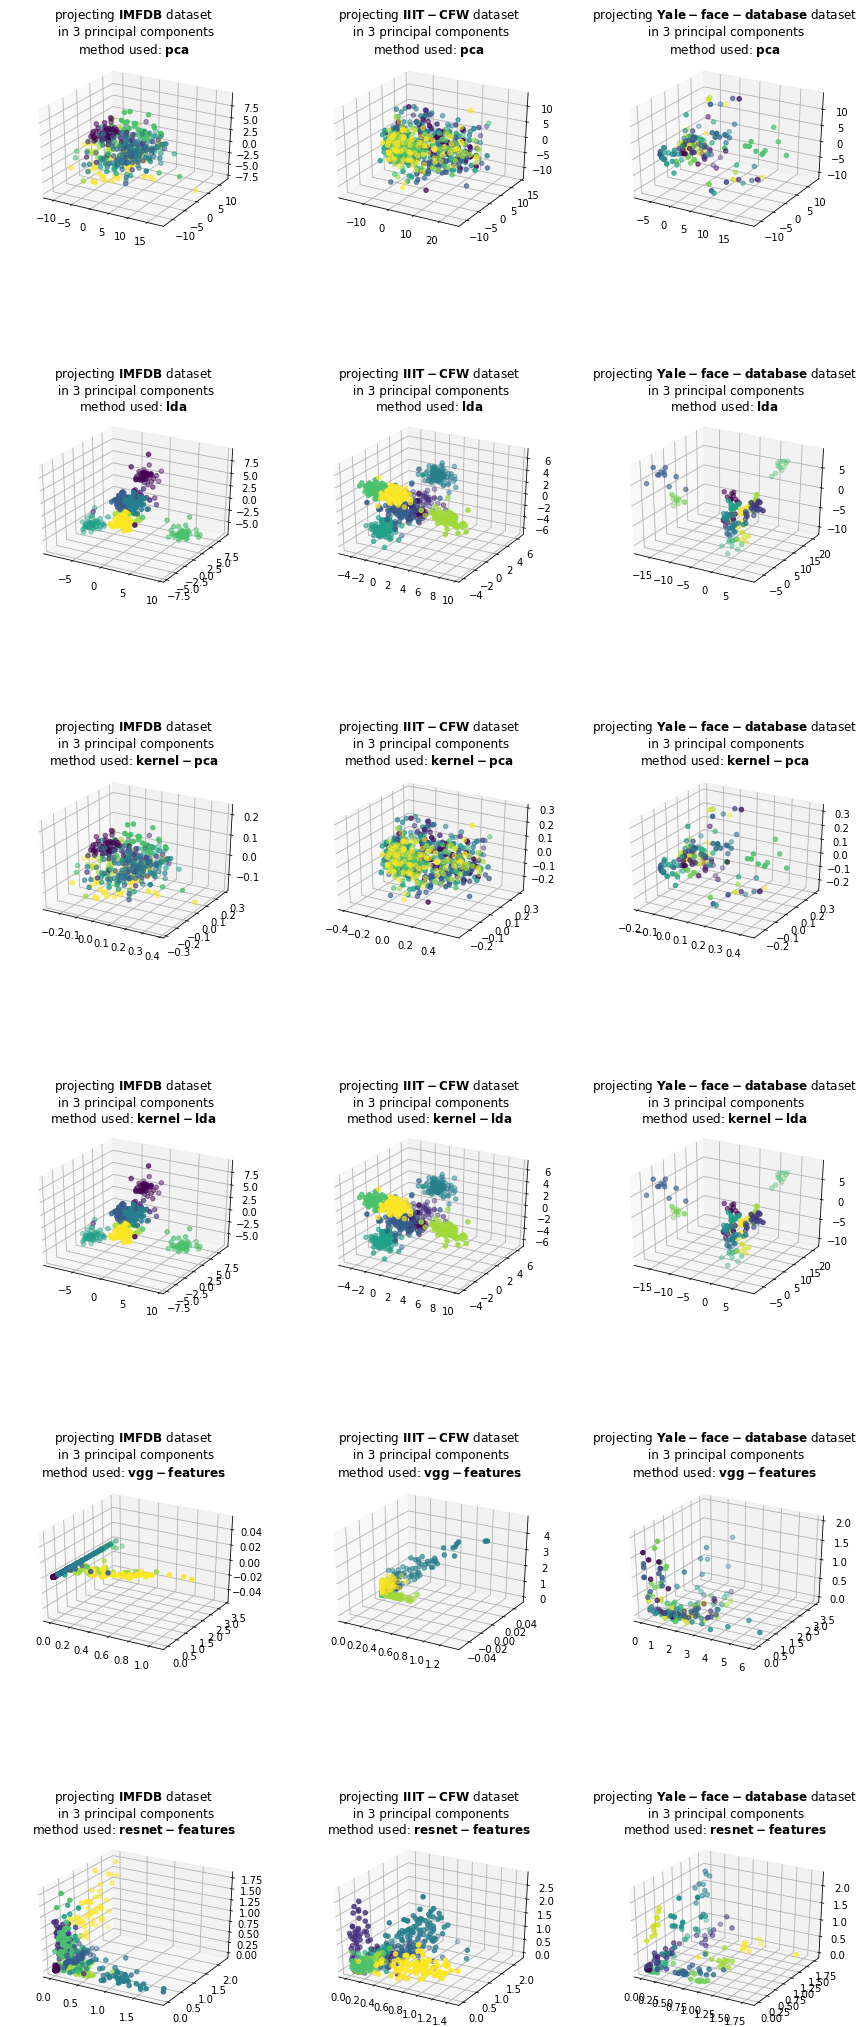

In [16]:
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(15,36))
methods = [get_pca,get_lda,get_kernel_pca,get_kernel_lda,get_vgg_features,get_resnet_features]
method_names = ['pca','lda','kernel-pca','kernel-lda','vgg-features','resnet-features']
for i,feature in enumerate(methods):
    if feature in [get_pca, get_kernel_pca]:
        X1_3D = feature(X1,3)
        X2_3D = feature(X2,3)
        X3_3D = feature(X3,3)
    elif feature in [get_lda, get_kernel_lda]:
        X1_3D = feature(X1,y1,3)
        X2_3D = feature(X2,y2,3)
        X3_3D = feature(X3,y3,3)
    elif feature in [get_vgg_features, get_resnet_features]:
        X1_3D = feature(dirpath1)
        X2_3D = feature(dirpath2)
        X3_3D = feature(dirpath3)
    ax1 = fig.add_subplot(6,3,1+i*3, projection='3d')
    ax1.scatter(X1_3D[:,0],X1_3D[:,1],X1_3D[:,2],c=y1)
    ax1.title.set_text('projecting '+ r"$\bf{" + ' IMFDB ' + "}$"+' dataset \n in 3 principal components\nmethod used: '+ r"$\bf{" + method_names[i] + "}$")

    ax2 = fig.add_subplot(6,3,2+i*3, projection='3d')
    ax2.scatter(X2_3D[:,0],X2_3D[:,1],X2_3D[:,2],c=y2)
    ax2.title.set_text('projecting '+ r"$\bf{" + 'IIIT-CFW' + "}$"+' dataset \n in 3 principal components\nmethod used: '+ r"$\bf{" + method_names[i] + "}$")

    ax3 = fig.add_subplot(6,3,3+i*3, projection='3d')
    ax3.scatter(X3_3D[:,0],X3_3D[:,1],X3_3D[:,2],c=y3)
    ax3.title.set_text('projecting '+ r"$\bf{" + 'Yale-face-database' + "}$"+' dataset \n in 3 principal components\nmethod used: '+ r"$\bf{" + method_names[i] + "}$")

plt.subplots_adjust(hspace=1)

Dataset shape: (400, 32, 32, 3)
Dataset shape: (672, 32, 32, 3)
Dataset shape: (165, 32, 32, 3)


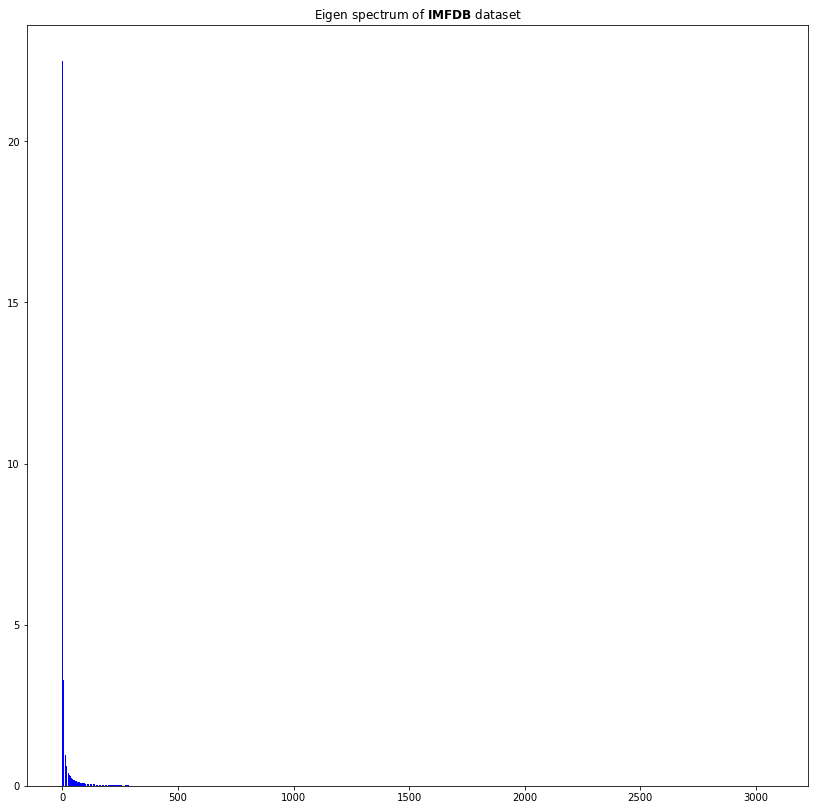

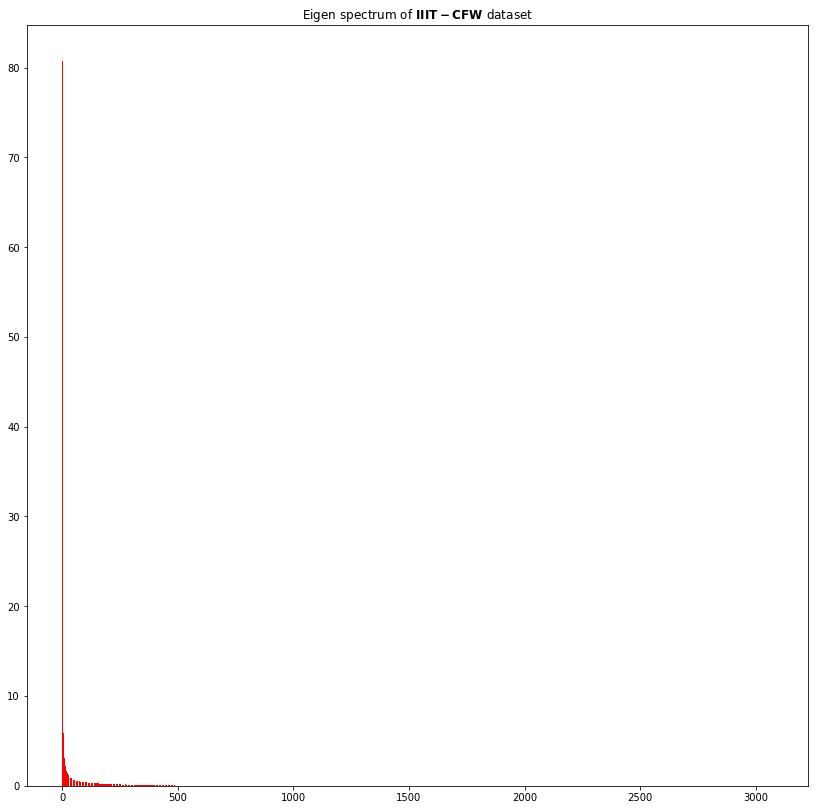

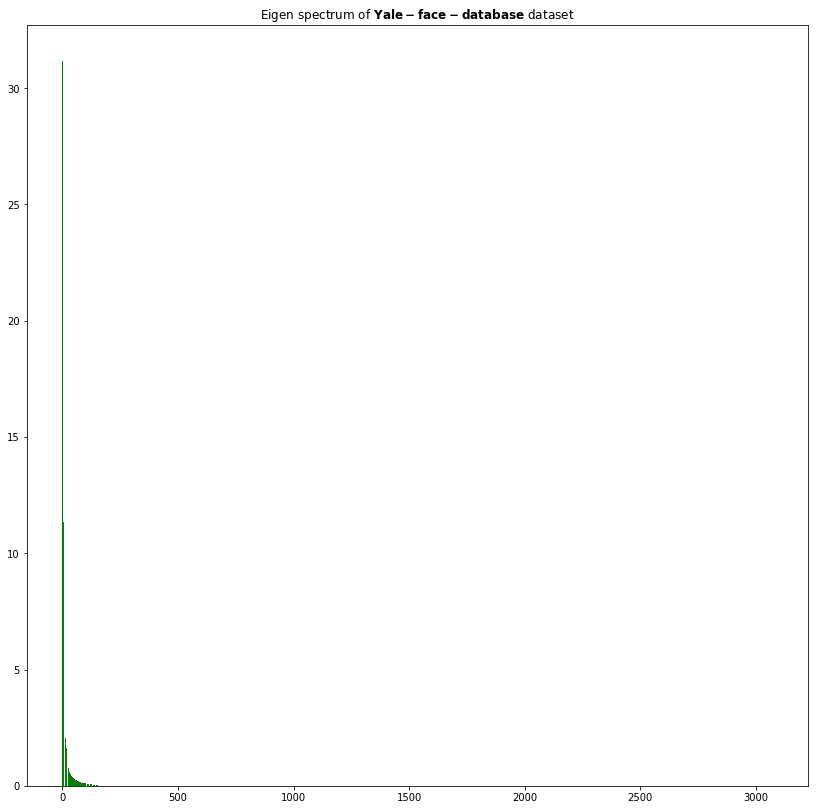

In [17]:
X,y = load_data(dirpath1)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))
COVX = np.cov(X.T)
Eval1,Evec1 = np.linalg.eig(COVX)
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111)
ax1.bar([i+1 for i in range(len(Eval1))],Eval1,color='blue')
ax1.title.set_text('Eigen spectrum of '+ r"$\bf{" + 'IMFDB' + "}$"+' dataset')

X,y = load_data(dirpath2)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))
COVX = np.cov(X.T)
Eval2,Evec2 = np.linalg.eig(COVX)
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111)
ax1.bar([i+1 for i in range(len(Eval2))],Eval2,color='red')
ax1.title.set_text('Eigen spectrum of '+ r"$\bf{" + 'IIIT-CFW' + "}$"+' dataset')

X,y = load_data(dirpath3)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))
COVX = np.cov(X.T)
Eval3,Evec3 = np.linalg.eig(COVX)
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111)
ax1.bar([i+1 for i in range(len(Eval3))],Eval3,color='green')
ax1.title.set_text('Eigen spectrum of '+ r"$\bf{" + 'Yale-face-database' + "}$"+' dataset')

1(c). Reconstruct  the  image  back for each case


In [18]:
def reconstruct_images(Evec,low_dimension_data):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    pass
    reconstruct_X = np.dot(low_dimension_data,np.real(Evec))
    
    return reconstruct_X    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IMFDBreconstructed


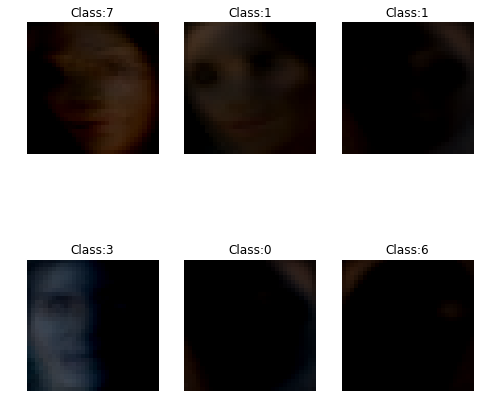

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Error % if top 3 eigenvectors used  42.55421698263424
IIIT-CFWreconstructed


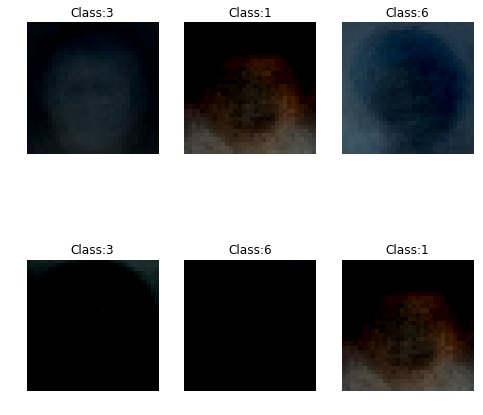

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Error % if top 3 eigenvectors used  69.18221363622537
Yale-face-databasereconstructed


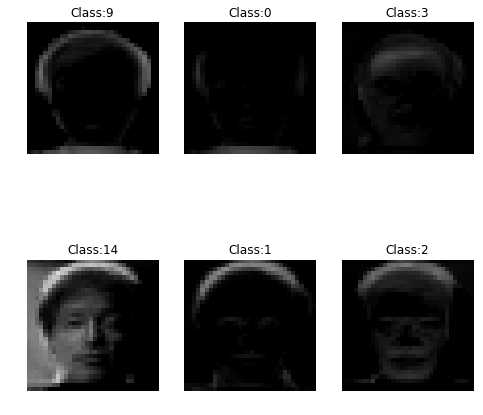

Error % if top 3 eigenvectors used  71.56619322161836


In [38]:
data1 = 'IMFDB'
data2 = 'IIIT-CFW'
data3 = 'Yale-face-database'
lowD = 5
X1_3D = get_pca(X1,lowD)
X2_3D = get_pca(X2,lowD)
X3_3D = get_pca(X3,lowD)

# Display results 
# NOTE: RE-RUN CELL IF PROPER IMAGE DOSEN'T SHOW
#_______________________________________________________________________________________________________________
print(data1 + 'reconstructed')
Evec1 = np.array(Evec1).T
X_reconstructed = reconstruct_images(Evec1[0:lowD,:],X1_3D)
X_reconstructed_3D = X_reconstructed.reshape(400,32,32,3).astype(float)

# Display random images
ind = np.random.randint(0,y1.shape[0],6)
disply_images(X_reconstructed_3D[ind,...],y1[ind],row=2,col=3)

# Show the reconstruction error
print('Error % if top 3 eigenvectors used  ' + str(100*np.sqrt(np.mean((X1 - X_reconstructed)**2))))
#_______________________________________________________________________________________________________________
print(data2 + 'reconstructed')
Evec2 = np.array(Evec2).T
X_reconstructed = reconstruct_images(Evec2[0:lowD,:],X2_3D)
X_reconstructed_3D = X_reconstructed.reshape(X_reconstructed.shape[0],32,32,3).astype(float)

# Display random images
ind = np.random.randint(0,y2.shape[0],6)
disply_images(X_reconstructed_3D[ind,...],y2[ind],row=2,col=3)

# Show the reconstruction error
print('Error % if top 3 eigenvectors used  ' + str(100*np.sqrt(np.mean((X2 - X_reconstructed)**2))))
#_______________________________________________________________________________________________________________
print(data3 + 'reconstructed')
Evec3 = np.array(Evec3).T
X_reconstructed = reconstruct_images(Evec3[0:lowD,:],X3_3D)
X_reconstructed_3D = X_reconstructed.reshape(X_reconstructed.shape[0],32,32,3).astype(float)

# Display random images
ind = np.random.randint(0,y3.shape[0],6)
disply_images(X_reconstructed_3D[ind,...],y3[ind],row=2,col=3)

# Show the reconstruction errorfi
print('Error % if top 3 eigenvectors used  ' + str(100*np.sqrt(np.mean((X3 - X_reconstructed)**2))))

1(d). Which person/identity is difficult to represent com-pactly with fewer eigen vectors?  Why is that?  Explain with 
your empirical observations and intuitive answers

In [20]:
# code goes here

2(a). Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. 

2(b)Which method works well? Do a comparitivestudy. 


You already know the paper [Face Recognition Us-ing  Kernel  Methods](!http://face-rec.org/algorithms/Kernel/nips01.pdf) .See  this  as  an  example for empirical analysis of different features/classification.

In [21]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
class Classifier():
    def __init__(self,hidden_layer,max_iterations):
        super().__init__()
    # Define your parameters eg, W,b, max_iterations etc. 
        self.clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=hidden_layer, random_state=1, warm_start=True, max_iter=max_iterations)
        
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        
        return self.clf.predict(X)
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        return metrics.confusion_matrix(pred,y)
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        
        self.clf.fit(X_train, y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        predicted = self.clf.predict(X_validate)

        # Create a confusion matrix
        confusion_matrix = self.confusion_matrix(predicted,y_validate)
        # Calculate Validation accuracy 
        accuracy = metrics.accuracy_score(predicted,y_validate)
        # Calculate precision and recall 
        precision = metrics.precision_score(predicted,y_validate,average='weighted')
        recall = metrics.recall_score(predicted,y_validate,average='weighted')
        # Calculate F1-score
        f1_score = metrics.f1_score(predicted,y_validate,average='weighted')
        
        return confusion_matrix,accuracy,precision,recall,f1_score




IMFDB
accuracy = 81.0000%
precision = 83.0547%
recall = 81.0000%
f1_score = 81.2415%
confusion matrix values :
 [[11  0  0  0  0  0  0  0]
 [ 0 10  1  3  1  0  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  0 10  0  1  0  1]
 [ 0  0  0  0 11  0  0  0]
 [ 0  2  0  1  0 10  1  0]
 [ 0  1  0  0  0  0 11  2]
 [ 0  1  4  0  0  0  0 13]]



IIIT-CFW
accuracy = 52.3810%
precision = 52.6559%
recall = 52.3810%
f1_score = 51.4688%
confusion matrix values :
 [[ 7  2  1  4  1  1  0  1]
 [ 0  6  2  2  1  0  1  0]
 [ 1  1  7  3  3  2  1  5]
 [ 2  0  1 13  1  1  2  0]
 [ 1  0  4  0 13  2  0  4]
 [ 0  0  0  0  1 12  1  2]
 [ 0  0  1  2  1  1 23  1]
 [ 0  0  3  3  3  9  2  7]]



Yale-face-database
accuracy = 85.7143%
precision = 90.8730%
recall = 85.7143%
f1_score = 86.3379%
confusion matrix values :
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 2 0 0 0 0 0 0 0 1 0]
 [0 0 0

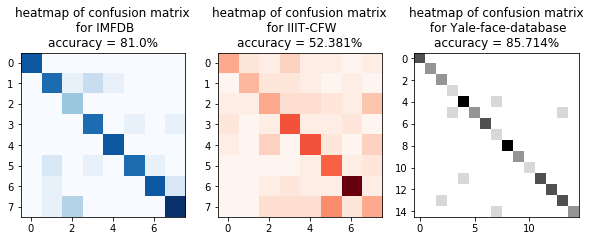

In [22]:
# Create a train and validation split to train your classifier 
from sklearn.model_selection import train_test_split
from random import randint
DATASETSNAMES = [data1,data2,data3]
COLORS = ['Blues','Reds','Greys']
fig = plt.figure(figsize=(10,20))
ax = [plt.subplot(131),plt.subplot(132),plt.subplot(133)]
for i,[X,Y] in enumerate([[X1,y1],[X2,y2],[X3,y3]]):
    print('\n\n\n'+DATASETSNAMES[i])
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size=1/4, random_state=randint(0,100))
    Neural_network = Classifier([50],100)
    Neural_network.train(X_train,y_train)
    confusion_matrix,accuracy,precision,recall,f1_score = Neural_network.validate(X_validate,y_validate)
    print("accuracy = %0.4f%%"%(accuracy*100))
    print('precision = %0.4f%%'%(precision*100))
    print('recall = %0.4f%%'%(recall*100))
    print('f1_score = %0.4f%%'%(f1_score*100))
    ax[i].imshow(confusion_matrix,cmap=COLORS[i])
    ax[i].title.set_text('heatmap of confusion matrix' +'\n'+' for '+DATASETSNAMES[i]+'\naccuracy = '+str(round(accuracy*100,3))+'%')
    print('confusion matrix values :\n',confusion_matrix)

In [36]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score

# Print the table. (You can use Pandas)
from pandas import DataFrame as DF
from IPython.display import display
confusion_matrices = []
best_method = []
best_accuracies = []
methods = [get_pca,get_lda,get_kernel_pca,get_kernel_lda,get_vgg_features,get_resnet_features]
method_names = ['pca','lda','kernel-pca','kernel-lda','vgg-features','resnet-features']
reduced_dimension = ['30','10','30','10','>4k','>2k']
for [Xdata,ydata,namedata,dirpath] in [[X1,y1,data1,dirpath1],[X2,y2,data2,dirpath2],[X3,y3,data3,dirpath3]]:
    TABLE = []
    accuracies = []
    all_confusion_matrices = []
    for i,feature in enumerate(methods):
        if feature in [get_pca, get_kernel_pca]:
            X,y = feature(Xdata,30),ydata
        elif feature in [get_lda, get_kernel_lda]:
            X,y = feature(Xdata,ydata,10),ydata
        elif feature in [get_vgg_features, get_resnet_features]:
            X,y = feature(dirpath),ydata
        X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=1/4, random_state=randint(0,100))
        Neural_network = Classifier([50],100)
        Neural_network.train(X_train,y_train)
        confusion_matrix,accuracy,precision,recall,f1_score = Neural_network.validate(X_validate,y_validate)
        TABLE.append([method_names[i],reduced_dimension[i],str(round((1-accuracy)*100,3))+'%',str(round(accuracy,3)),str(round(f1_score,3))])
        accuracies.append(accuracy)
        all_confusion_matrices.append(confusion_matrix)
        df = DF(TABLE,columns = ['Feature','Reduced Dimension','Classification Error','Accuracy','F1-score'])
    best = np.argmax(accuracies)
    best_accuracies.append(max(accuracies))
    confusion_matrices.append(all_confusion_matrices[best])
    best_method.append(method_names[best])
    print('\n\n\n',namedata)
    display(df.style)




 IMFDB


,Feature,Reduced Dimension,Classification Error,Accuracy,F1-score
0,pca,30,23.0%,0.77,0.773
1,lda,10,5.0%,0.95,0.95
2,kernel-pca,30,23.0%,0.77,0.765
3,kernel-lda,10,3.0%,0.97,0.97
4,vgg-features,>4k,10.0%,0.9,0.901
5,resnet-features,>2k,2.0%,0.98,0.98





 IIIT-CFW


,Feature,Reduced Dimension,Classification Error,Accuracy,F1-score
0,pca,30,47.619%,0.524,0.518
1,lda,10,3.571%,0.964,0.964
2,kernel-pca,30,39.286%,0.607,0.613
3,kernel-lda,10,4.167%,0.958,0.958
4,vgg-features,>4k,32.143%,0.679,0.685
5,resnet-features,>2k,5.357%,0.946,0.947





 Yale-face-database


,Feature,Reduced Dimension,Classification Error,Accuracy,F1-score
0,pca,30,11.905%,0.881,0.873
1,lda,10,0.0%,1.0,1.0
2,kernel-pca,30,16.667%,0.833,0.854
3,kernel-lda,10,0.0%,1.0,1.0
4,vgg-features,>4k,59.524%,0.405,0.421
5,resnet-features,>2k,2.381%,0.976,0.976


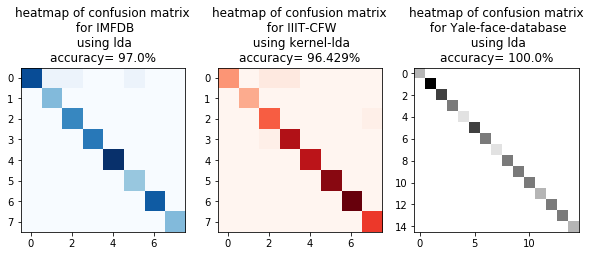

In [24]:
# For each dataset print the confusion matrix for the best model 
COLORS = ['Blues','Reds','Greys']
fig = plt.figure(figsize=(10,20))
ax = [plt.subplot(131),plt.subplot(132),plt.subplot(133)]
for i in range(3):
    ax[i].imshow(confusion_matrices[i],cmap=COLORS[i])
    ax[i].title.set_text('heatmap of confusion matrix' +'\n'+' for '+DATASETSNAMES[i]+'\n using '+best_method[i]+'\naccuracy= '+str(round(100*best_accuracies[i],3))+'%')

3. Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? Here you will use a popular implementation.(Worth  reading and understanding  t-SNE.  We  will not discuss it in the class and out of scope for thiscourse/exams.

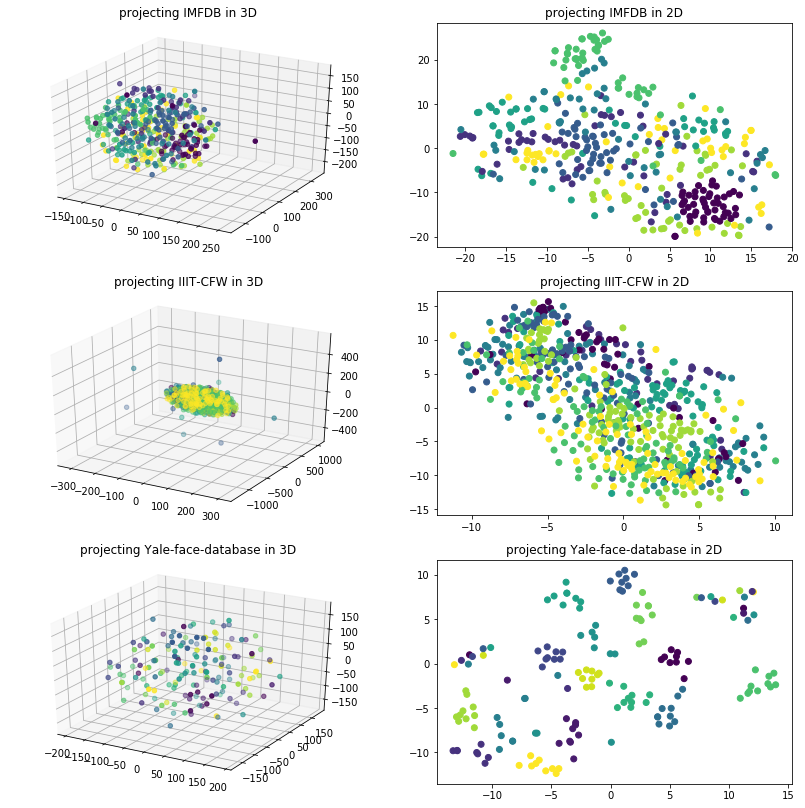

In [25]:
# Compute TSNE for different features and create a scatter plot

# X =  # feature 
# k = 3 # Number of components in TSNE
fig = plt.figure(figsize=(14,14))
# Compute
for i,[X,Y,datai] in enumerate([[X1,y1,data1],[X2,y2,data2],[X3,y3,data3]]):
    X_TSNE3D = TSNE(n_components=3).fit_transform(X)
    X_TSNE2D = TSNE(n_components=2).fit_transform(X)

    # Plot the representation in 2d/3d
    ax1 = fig.add_subplot(3,2,1+i*2, projection='3d')
    ax1.scatter(X_TSNE3D[:,0],X_TSNE3D[:,1],X_TSNE3D[:,2],c=Y)
    ax1.title.set_text('projecting '+datai+' in 3D')
    ax2 = fig.add_subplot(3,2,2+i*2)
    ax2.scatter(X_TSNE2D[:,0],X_TSNE2D[:,1],c=Y)
    ax2.title.set_text('projecting '+datai+' in 2D')




4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN 

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

_______________________________________________________________________

4(c)Show empirical re-sults  with  all  the  representations

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
class FaceVerification():
    def __init__(self):
        super().__init__()
    
    # Define your parameters eg, W,b, max_iterations etc. 
        self.knn = KNeighborsClassifier(n_neighbors=10)
    def verify(self,X,class_id):
        """
            Given an input X find if the class id is correct or not.
            
            @return verfication_results => N vector containing True or False. 
                    If the class-id matches with your prediction then true else false.   
        """
        return np.mean(np.equal(self.knn.predict(X),class_id))
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your verification system will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.knn.fit(X_train, y_train)
    def validate(self,X_validate,y_validate):
        """
            How good is your system on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        predicted = self.knn.predict(X_validate)
        
        # Create a confusion matrix
        confusion_matrix = metrics.confusion_matrix(predicted,y_validate)
        # Calculate Validation accuracy 
        accuracy = metrics.accuracy_score(predicted,y_validate)
        # Calculate precision and recall 
        precision = metrics.precision_score(predicted,y_validate,average='weighted')
        recall = metrics.recall_score(predicted,y_validate,average='weighted')
        # Calculate F1-score
        f1_score = metrics.f1_score(predicted,y_validate,average='weighted')
        #verification error
        verification_error = self.verify(X_validate,y_validate)
        return confusion_matrix,accuracy,precision,recall,f1_score,verification_error




IMFDB
accuracy = 59.0000%
precision = 78.9466%
recall = 59.0000%
verification error = 59.0000%
confusion matrix values :
 [[13  2  1  4  1  0  4  0]
 [ 0  9  0  3  4  0  0  1]
 [ 0  3 13  5  2  0  3  1]
 [ 0  0  0  3  0  1  0  0]
 [ 0  0  0  0  9  0  0  0]
 [ 0  0  0  2  0  8  0  0]
 [ 0  0  0  0  0  0  2  0]
 [ 0  0  0  2  0  0  2  2]]



IIIT-CFW
accuracy = 30.9524%
precision = 63.5736%
recall = 30.9524%
verification error = 30.9524%
confusion matrix values :
 [[ 6  3  1  1  3  3  3  2]
 [ 0  2  0  0  0  0  0  0]
 [ 3  4 13  9  9 22 14 11]
 [ 1  1  2 13  7  1  0  6]
 [ 1  1  0  0 11  0  1  3]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  0]
 [ 0  0  0  0  0  2  1  4]]



Yale-face-database
accuracy = 71.4286%
precision = 79.7619%
recall = 71.4286%
verification error = 71.4286%
confusion matrix values :
 [[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 3 0 0 0]
 [1 0 0 0 

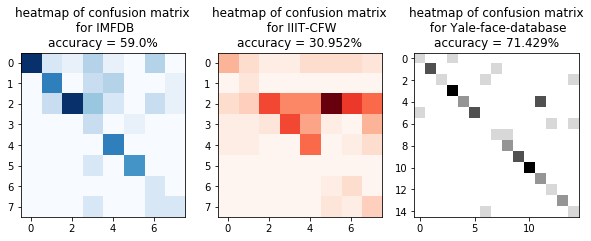

In [27]:
# Create a train and validation split to train your classifier 
from sklearn.model_selection import train_test_split
from random import randint
DATASETSNAMES = [data1,data2,data3]
COLORS = ['Blues','Reds','Greys']
fig = plt.figure(figsize=(10,20))
ax = [plt.subplot(131),plt.subplot(132),plt.subplot(133)]
for i,[X,Y] in enumerate([[X1,y1],[X2,y2],[X3,y3]]):
    print('\n\n\n'+DATASETSNAMES[i])
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size=1/4, random_state=randint(0,100))
    KNN = FaceVerification()
    KNN.train(X_train,y_train)
    confusion_matrix,accuracy,precision,recall,f1_score,verification_error = KNN.validate(X_validate,y_validate)
    print("accuracy = %0.4f%%"%(accuracy*100))
    print('precision = %0.4f%%'%(precision*100))
    print('recall = %0.4f%%'%(recall*100))
    print('verification error = %0.4f%%'%(verification_error*100))
    ax[i].imshow(confusion_matrix,cmap=COLORS[i])
    ax[i].title.set_text('heatmap of confusion matrix' +'\n'+' for '+DATASETSNAMES[i]+'\naccuracy = '+str(round(accuracy*100,3))+'%')
    print('confusion matrix values :\n',confusion_matrix)




 IMFDB


,Feature,Reduced Dimension,verification Error,Accuracy,precision
0,pca,30,56.0%,0.56,0.746
1,lda,10,98.0%,0.98,0.981
2,kernel-pca,30,59.0%,0.59,0.741
3,kernel-lda,10,100.0%,1.0,1.0
4,vgg-features,>4k,88.0%,0.88,0.907
5,resnet-features,>2k,95.0%,0.95,0.951





 IIIT-CFW


,Feature,Reduced Dimension,verification Error,Accuracy,precision
0,pca,30,48.214%,0.482,0.561
1,lda,10,95.833%,0.958,0.962
2,kernel-pca,30,48.81%,0.488,0.587
3,kernel-lda,10,98.214%,0.982,0.984
4,vgg-features,>4k,71.429%,0.714,0.736
5,resnet-features,>2k,97.024%,0.97,0.971





 Yale-face-database


,Feature,Reduced Dimension,verification Error,Accuracy,precision
0,pca,30,80.952%,0.81,0.906
1,lda,10,92.857%,0.929,0.964
2,kernel-pca,30,78.571%,0.786,0.861
3,kernel-lda,10,95.238%,0.952,0.968
4,vgg-features,>4k,47.619%,0.476,0.644
5,resnet-features,>2k,100.0%,1.0,1.0


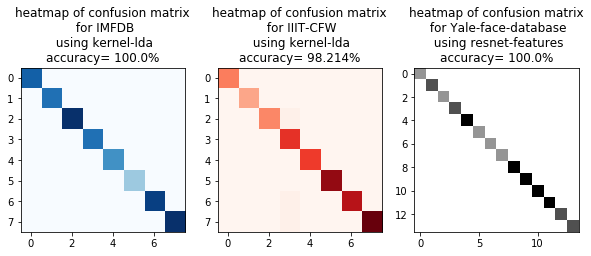

In [35]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision

from pandas import DataFrame as DF
from IPython.display import display
confusion_matrices = []
best_method = []
best_accuracies = []
methods = [get_pca,get_lda,get_kernel_pca,get_kernel_lda,get_vgg_features,get_resnet_features]
method_names = ['pca','lda','kernel-pca','kernel-lda','vgg-features','resnet-features']
reduced_dimension = ['30','10','30','10','>4k','>2k']
for [Xdata,ydata,namedata,dirpath] in [[X1,y1,data1,dirpath1],[X2,y2,data2,dirpath2],[X3,y3,data3,dirpath3]]:
    TABLE = []
    accuracies = []
    all_confusion_matrices = []
    for i,feature in enumerate(methods):
        if feature in [get_pca, get_kernel_pca]:
            X,y = feature(Xdata,30),ydata
        elif feature in [get_lda, get_kernel_lda]:
            X,y = feature(Xdata,ydata,10),ydata
        elif feature in [get_vgg_features, get_resnet_features]:
            X,y = feature(dirpath),ydata
        X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=1/4, random_state=randint(0,100))
        knn = FaceVerification()
        knn.train(X_train,y_train)
        confusion_matrix,accuracy,precision,recall,f1_score,verification_error = knn.validate(X_validate,y_validate)
        TABLE.append([method_names[i],reduced_dimension[i],str(round(verification_error*100,3))+'%',str(round(accuracy,3)),str(round(precision,3))])
        accuracies.append(accuracy)
        all_confusion_matrices.append(confusion_matrix)
        df = DF(TABLE,columns = ['Feature','Reduced Dimension','verification Error','Accuracy','precision'])
    best = np.argmax(accuracies)
    best_accuracies.append(max(accuracies))
    confusion_matrices.append(all_confusion_matrices[best])
    best_method.append(method_names[best])
    print('\n\n\n',namedata)
    display(df.style)
    
# For each dataset print the confusion matrix for the best model 
COLORS = ['Blues','Reds','Greys']
fig = plt.figure(figsize=(10,20))
ax = [plt.subplot(131),plt.subplot(132),plt.subplot(133)]
for i in range(3):
    ax[i].imshow(confusion_matrices[i],cmap=COLORS[i])
    ax[i].title.set_text('heatmap of confusion matrix' +'\n'+' for '+DATASETSNAMES[i]+'\n using '+best_method[i]+'\naccuracy= '+str(round(100*best_accuracies[i],3))+'%')

### Extenstion / Application
    Create a system for any one of the following problems:

- Politicians  vs  Filmstars  in  a  public  data  set.   (eg.LFW)
        You already have seen IIIT-CFW dataset. Use it for classification. 
- Age prediction
        Given different actors/actress in IMFDB create new labels based on their age.  
- Gender prediction
        Given different actors/actress in IMFDB+IIIT-CFW create new labels based on their gender.
- Emotion classification
        Both the yale dataset and IMFDB contain an `emotion.txt` file. Using that you can create a emotion predicter 
- cartoon vs real images
        Use a combination of IIIT-CFW and other dataset. 
        


You are free to use a new dataset that is publicly avail-able or even create one by crawling from internet.

In [29]:
# Load data
# ________POLITICIAN vs FILMSTARS_____________________
# 0,1,2,3 are film stars
# 4,5,6,7 are politicians
# hence modification to do is divide by 4
X = X2
y = [ 1+int(person/4) for person in y2]

In [30]:
# Define your features
Xlda = get_lda(X,y,4)
Xpca = get_pca(X,3)
Xtsne = TSNE(n_components=3).fit_transform(X)
Xtsne2D = TSNE(n_components=2).fit_transform(X)

In [31]:
# Create your classifier
X_train, X_validate, y_train, y_validate = train_test_split(Xlda, y, test_size=1/4, random_state=randint(0,100))
Neural_network = Classifier([20],100)
Neural_network.train(X_train,y_train)

# Validate your classifier
confusion_matrix,accuracy,precision,recall,f1_score = Neural_network.validate(X_validate,y_validate)

accuracy = 97.0238%
precision = 97.1093%
recall = 97.0238%
f1_score = 97.0347%
confusion matrix values :
 [[65  1]
 [ 4 98]]
(672, 3)


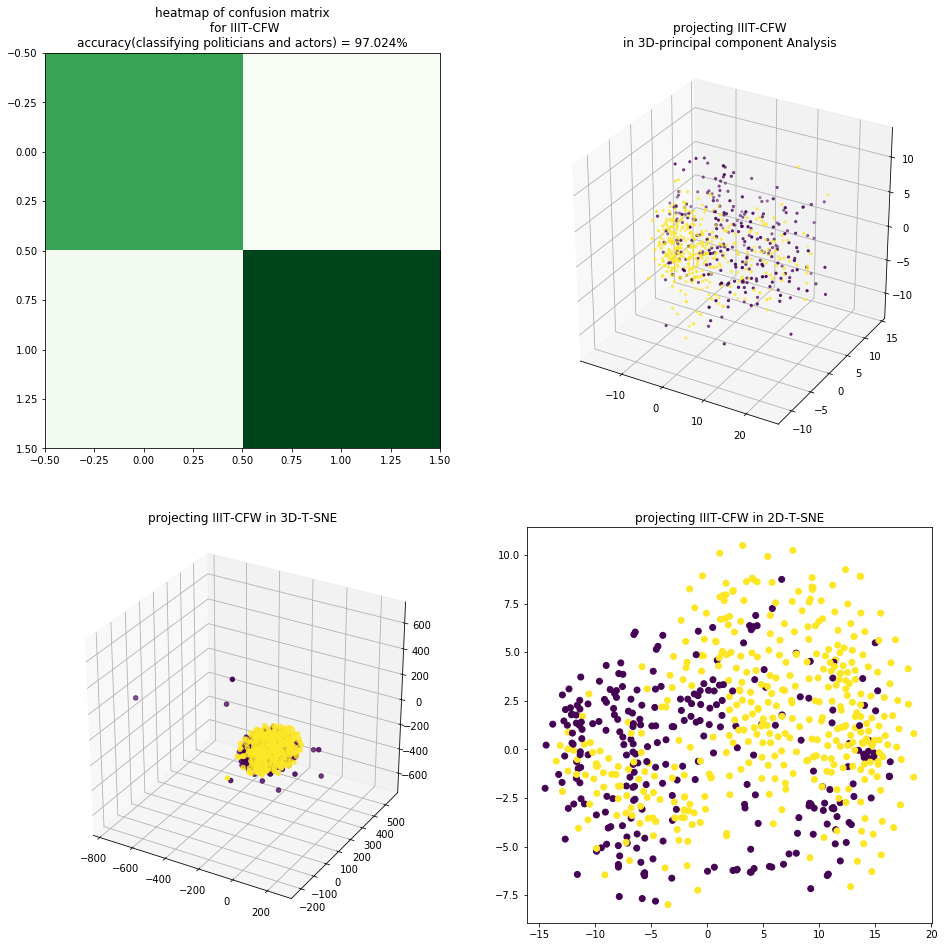

In [32]:
# Show qualitative results such as accuracy, k-fold validation, TSNE/PCA/Isomap plots, etc.  
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(221)
print("accuracy = %0.4f%%"%(accuracy*100))
print('precision = %0.4f%%'%(precision*100))
print('recall = %0.4f%%'%(recall*100))
print('f1_score = %0.4f%%'%(f1_score*100))
ax.imshow(confusion_matrix,cmap='Greens')
ax.title.set_text('heatmap of confusion matrix' +'\n'+' for '+data2+'\naccuracy(classifying politicians and actors) = '+str(round(accuracy*100,3))+'%')
print('confusion matrix values :\n',confusion_matrix)

print(Xpca.shape)
ax = fig.add_subplot(222,projection='3d')
ax.scatter(Xpca[:,0],Xpca[:,1],Xpca[:,2],c=y,s=5)
ax.title.set_text('projecting '+data2+'\nin 3D-principal component Analysis')

ax = fig.add_subplot(223,projection='3d')
ax.scatter(Xtsne[:,0],Xtsne[:,1],Xtsne[:,2],c=y)
ax.title.set_text('projecting '+data2+' in 3D-T-SNE')

ax = fig.add_subplot(224)
ax.scatter(Xtsne2D[:,0],Xtsne2D[:,1],c=y)
ax.title.set_text('projecting '+data2+' in 2D-T-SNE')

Class1: Film-Stars, Class2: politician


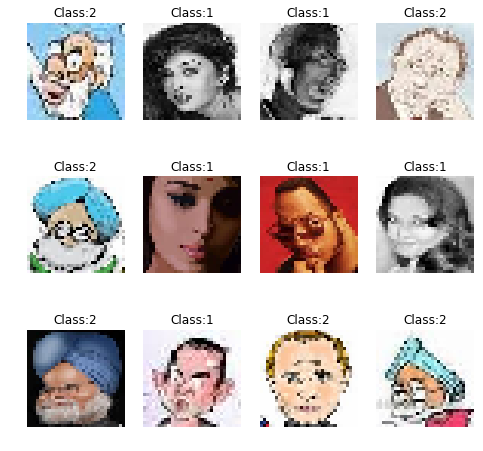

In [33]:
# Show quantitative results such as examples of correct prediction and wrong prediction
# Show sample images
Yp = Neural_network.classify(Xlda)
Yp = np.array(Yp)
X = np.array(X2).reshape(X2.shape[0],32,32,3)
ind = np.random.randint(0,Yp.shape[0],12)
print('Class1: Film-Stars, Class2: politician')
disply_images(X[ind,...],Yp[ind-1], row=3,col=4)